# Load some CESM Models

In [10]:
import sys
sys.path.append(sys.path[0]+'/../')


In [2]:
import helpers.fileHandler as fh

In [3]:
#Negative Case. Try bad model names
try:
    fh.loadModelData('CESM-LM','SST', '001')
except:
    print("Test passed - bad model name rejected")
else:
    raise RuntimeError ("Test failed, function accepted bad model name")
    
try:
    fh.loadModelData('CESM-LMEF','SST', '001')
except:
    print("Test passed - bad model name rejected")
else:
    raise RuntimeError ("Test failed, function accepted bad model name")


Test passed - bad model name rejected
Test passed - bad model name rejected


In [4]:
#Negative Case. Try bad variable names
try:
    fh.loadModelData('CESM-LME','SS', '001')
except:
    print("Test passed - bad variable name rejected")
else:
    raise RuntimeError ("Test failed, function accepted bad variable name")
    
try:
    fh.loadModelData('CESM-LME','SSTF', '001')
except:
    print("Test passed - bad variable name rejected")
else:
    raise RuntimeError ("Test failed, function accepted bad variable name")

Test passed - bad variable name rejected
Test passed - bad variable name rejected


In [5]:
#Negative Case. Try bad test names
try:
    fh.loadModelData('CESM-LME','SST', '014')
except:
    print("Test passed - bad test name rejected")
else:
    raise RuntimeError ("Test failed, function accepted bad test name")
    
try:
    fh.loadModelData('CESM-LME','SST', '0')
except:
    print("Test passed - bad test name rejected")
else:
    raise RuntimeError ("Test failed, function accepted bad test name")

Test passed - bad test name rejected
Test passed - bad test name rejected


# Try some things that should work

This is a normal ensemble run

In [6]:
fh.loadModelData('CESM-LME','SST', '013')

Files imported: 
 ['/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.013.pop.h.SST.170001-179912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.013.pop.h.SST.120001-129912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.013.pop.h.SST.090001-099912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.013.pop.h.SST.185001-200512.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.013.pop.h.SST.130001-139912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.013.pop.h.SST.160001-169912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.013.pop.h.SST.110001-119912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.013.pop.h.SST.180001-184912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.013.pop.h.SST.140001-149912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.013.pop.h.SST.085001-089912.nc', '

<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 13872, transport_comp: 5, transport_reg: 2, z_t: 1, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
    TLAT                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * lat_aux_grid          (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                 (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * time                  (time) object 0850-01-31 00:00:00 ... 2005-12-31 00...
  * z_t                   (z_t) float32 500.0
  * z_t_150m              (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                   (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot               (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * z_w_top               (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
Dimensions without coordinates: d2, moc_comp, nlat, nlon, transport_comp, transport_reg
Data variables: (12/54)
    ANGLE                 (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ANGLET                (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DXT                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DXU                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DYT                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DYU                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ...                    ...
    stefan_boltzmann      (time) float64 5.67e-08 5.67e-08 ... 5.67e-08 5.67e-08
    time_bound            (time, d2) object dask.array<chunksize=(600, 2), meta=np.ndarray>
    transport_components  (time, transport_comp) |S256 dask.array<chunksize=(600, 5), meta=np.ndarray>
    transport_regions     (time, transport_reg) |S256 dask.array<chunksize=(600, 2), meta=np.ndarray>
    vonkar                (time) float64 0.4 0.4 0.4 0.4 0.4 ... 0.4 0.4 0.4 0.4
    SST                   (time, z_t, nlat, nlon) float32 dask.array<chunksize=(600, 1, 384, 320), meta=np.ndarray>
Attributes: (12/13)
    nsteps_total:    7757000
    tavg_sum:        2678400.0
    title:           b.e11.BLMTRC5CN.f19_g16.013
    start_time:      This dataset was created on 2015-12-21 at 17:41:28.7
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    source:          CCSM POP2, the CCSM Ocean Component
    ...              ...
    calendar:        All years have exactly  365 days.
    tavg_sum_qflux:  2678400.0
    contents:        Diagnostic and Prognostic Variables
    revision:        $Id: tavg.F90 41939 2012-11-14 16:37:23Z mlevy@ucar.edu $
    NCO:             4.4.2
    history:         Tue Mar 29 11:34:51 2016: ncrename -v TEMP,SST b.e11.BLM...

This is a control run

In [7]:
testData=fh.loadModelData('CESM-LME','SST', '850forcing.003')
testData

Files imported: 
 ['/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.850forcing.003.pop.h.SST.120001-129912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.850forcing.003.pop.h.SST.170001-179912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.850forcing.003.pop.h.SST.160001-169912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.850forcing.003.pop.h.SST.130001-139912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.850forcing.003.pop.h.SST.185001-200512.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.850forcing.003.pop.h.SST.090001-099912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.850forcing.003.pop.h.SST.180001-184912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.850forcing.003.pop.h.SST.140001-149912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.850forcing.003.pop.h.SST.110001-119912.nc', 

<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 13872, transport_comp: 5, transport_reg: 2, z_t: 1, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
    TLAT                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * lat_aux_grid          (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                 (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * time                  (time) object 0850-01-31 00:00:00 ... 2005-12-31 00...
  * z_t                   (z_t) float32 500.0
  * z_t_150m              (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                   (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot               (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * z_w_top               (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
Dimensions without coordinates: d2, moc_comp, nlat, nlon, transport_comp, transport_reg
Data variables: (12/54)
    ANGLE                 (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ANGLET                (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DXT                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DXU                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DYT                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DYU                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ...                    ...
    stefan_boltzmann      (time) float64 5.67e-08 5.67e-08 ... 5.67e-08 5.67e-08
    time_bound            (time, d2) object dask.array<chunksize=(600, 2), meta=np.ndarray>
    transport_components  (time, transport_comp) |S256 dask.array<chunksize=(600, 5), meta=np.ndarray>
    transport_regions     (time, transport_reg) |S256 dask.array<chunksize=(600, 2), meta=np.ndarray>
    vonkar                (time) float64 0.4 0.4 0.4 0.4 0.4 ... 0.4 0.4 0.4 0.4
    SST                   (time, z_t, nlat, nlon) float32 dask.array<chunksize=(600, 1, 384, 320), meta=np.ndarray>
Attributes: (12/13)
    title:           b.e11.BLMTRC5CN.f19_g16.850forcing.003
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 41939 2012-11-14 16:37:23Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    ...              ...
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    3194500
    tavg_sum:        2678400.0
    tavg_sum_qflux:  2678400.0
    NCO:             4.4.2
    history:         Thu Jun  4 13:07:06 2015: ncrename -v TEMP,SST b.e11.BLM...

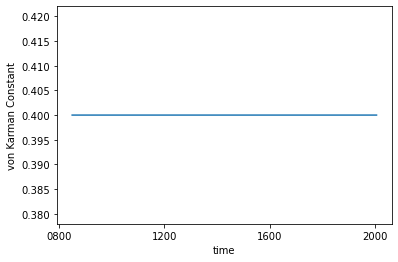

In [8]:
testData.vonkar.plot()

This is a validation output from NCAR

In [9]:
testData=fh.loadModelData('CESM-LME','cvdp_data', 'ORBITAL\.003')
testData

OSError: Requested files not found. Is the harddrive plugged in and does this test case exist?

In [ ]:
testData.plot.scatter('time', 'atlantic_nino')

This is a future result with RCP85

In [ ]:
testData=fh.loadModelData('CESM-LME', 'PSL', 'LME.002')

In [ ]:
testData

In [ ]:
testData.plot.scatter(x='time',y='PSL')